In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file into the dataframe
df = pd.read_csv("credit_analysis.csv")
df.head()

,CustomerID,Age,Gender,Income,LoanAmount,LoanTerm,CreditScore,EmploymentStatus,MaritalStatus,NumberOfDependents,ExistingLoansCount,LoanPurpose,Defaulted
0,1,56,Male,105680,4040,6,808,Self-employed,Single,4,1,Home,1
1,2,69,Male,22050,43422,48,625,Unemployed,Single,0,3,Business,1
2,3,46,Male,129996,27160,48,656,Employed,Married,2,1,Home,0
3,4,32,Male,53933,18633,6,690,Unemployed,Married,4,2,Car,1
4,5,60,Female,44951,30344,48,384,Unemployed,Single,2,0,Education,1


In [3]:
# Checking for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 CustomerID            0
Age                   0
Gender                0
Income                0
LoanAmount            0
LoanTerm              0
CreditScore           0
EmploymentStatus      0
MaritalStatus         0
NumberOfDependents    0
ExistingLoansCount    0
LoanPurpose           0
Defaulted             0
dtype: int64


No missing values found in the data. So we move on to the next step.

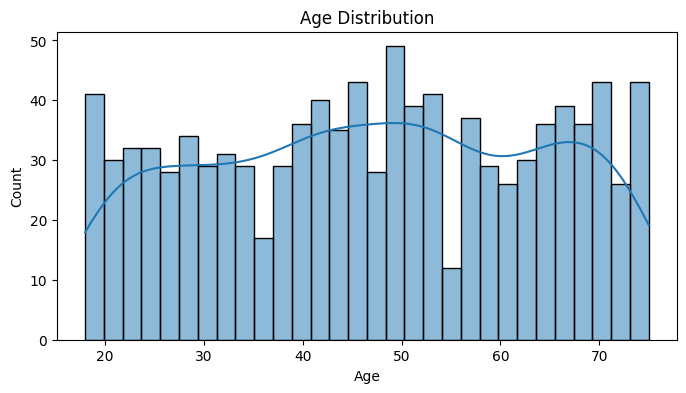

In [18]:
# Exploratory Data Analysis

# 1. Distribution of Age
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

The Age distribution appears fairly spread out with a slight peak around the late 40s to early 50s, indicating most customers are middle-aged, but there’s also a good number of younger and older individuals.

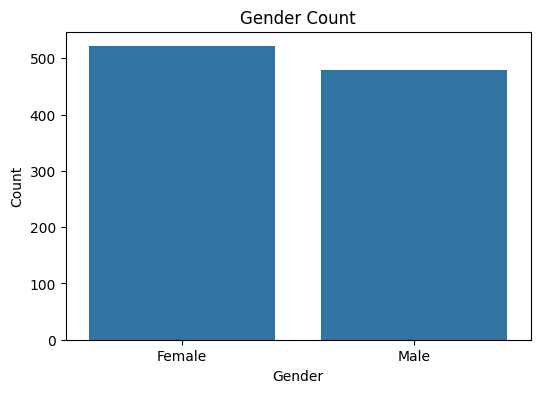

In [ ]:
# 2. Plot countplot for gender
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'}) 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The countplot visualizes the count is more similar across gender but showing a slightly higher count for females than males.

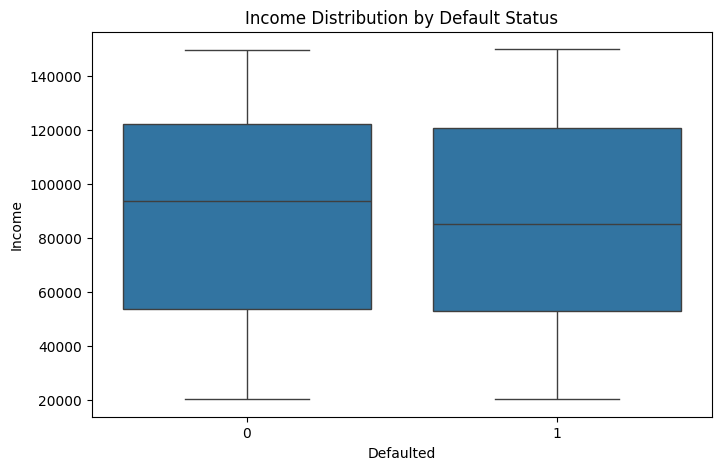

In [ ]:
# 3. Boxplot of Income by Defaulted (0 = No, 1 = Yes)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Defaulted', y='Income')
plt.title('Income Distribution by Default Status')
plt.show()

The boxplot shows income distribution based on default status. Both groups have similar median incomes, with most values falling between 60,000 and 120,000.

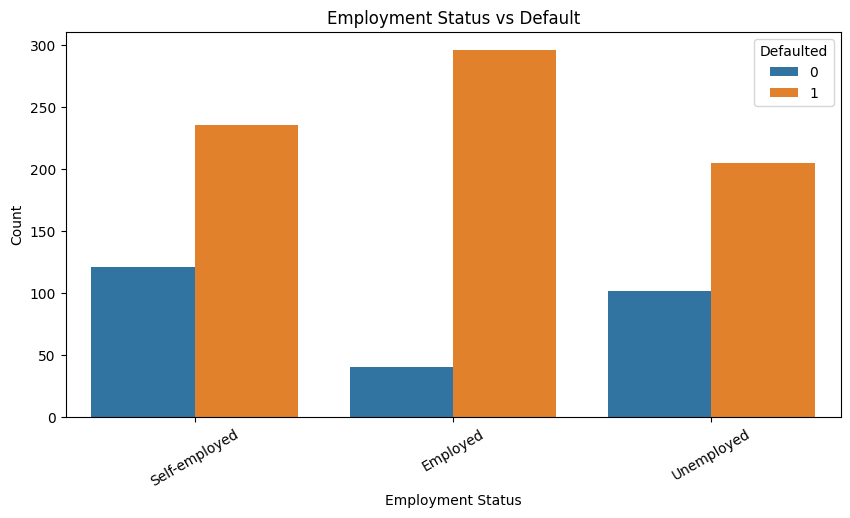

In [27]:
# 4. countplot for EmploymentStatus by Defaulted
employment_mapping = {0: 'Unemployed', 1: 'Self-employed', 2: 'Employed'}
df['EmploymentStatus'] = df['EmploymentStatus'].replace(employment_mapping)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='EmploymentStatus', hue='Defaulted')

# Ensure labels appear correctly
plt.title('Employment Status vs Default')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Adjust label rotation if necessary

plt.show()

The countplot shows how employment status relates to loan defaults. Employed individuals have the highest count of defaults, followed by self-employed and unemployed groups

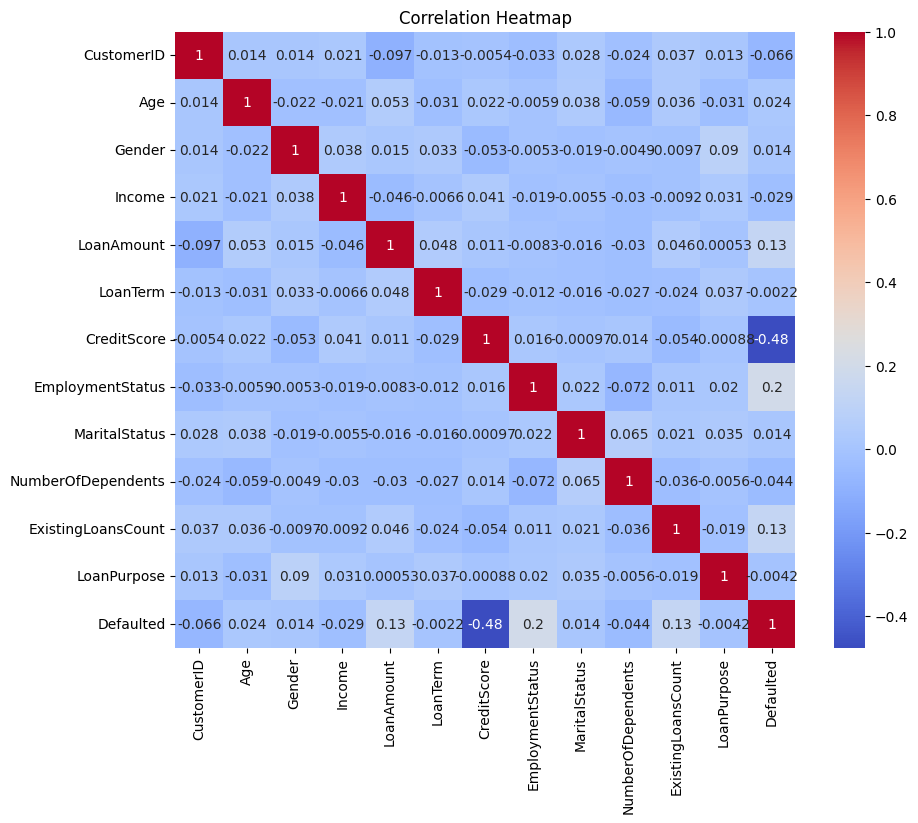

In [22]:
# 5. Correlation Heatmap for numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



The correlation heatmap visualizes relationships between loan-related variables. Strong correlations appear between income, loan amount, and credit score, while default status shows weaker correlations with other factors. This helps identify key influences on loan defaults.

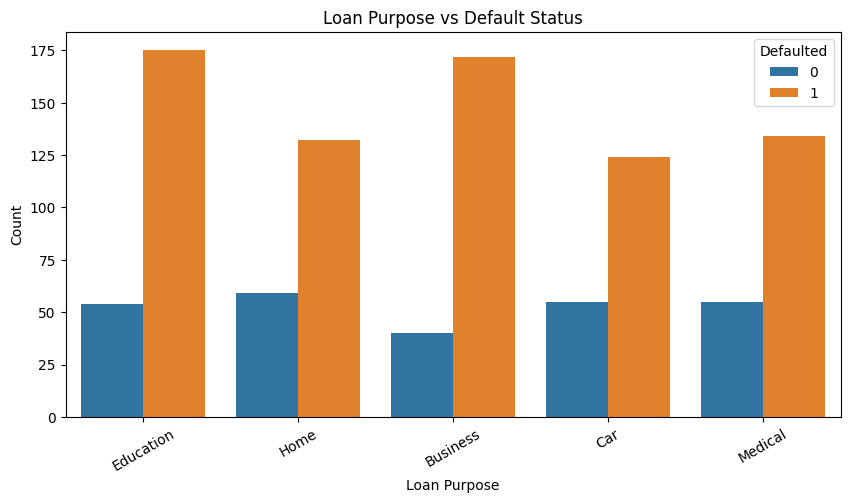

In [28]:
# 6. Loan Purpose distribution by Default status

# Mapping loan purpose numbers to their respective names
loan_mapping = {
    0: 'Home',
    1: 'Business',
    2: 'Car',
    3: 'Education',
    4: 'Medical',
    5: 'Personal'
}

df['LoanPurpose'] = df['LoanPurpose'].replace(loan_mapping)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='LoanPurpose', hue='Defaulted')

# Improve label visibility
plt.title('Loan Purpose vs Default Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=30)  # Adjust label rotation if needed

plt.show()

The countplot shows the distribution of loan purposes by default status. Default rates are higher for Education, Business, Car, and Medical loans, while Home loans have a more balanced default and non-default ratio. This highlights potential risk factors in different loan categories

In [4]:
#Using Label Encoding for categorical data
categorical_cols = ['Gender', 'EmploymentStatus', 'MaritalStatus', 'LoanPurpose']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
#Dropping the unwanted columns
X = df.drop(columns=['CustomerID','Defaulted'])
Y = df['Defaulted']

In [6]:
#Training the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
LogisticRegression(max_iter=5000, random_state=26)

LogisticRegression(max_iter=5000, random_state=26)

In [9]:
#Choosing and fitting the model

models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=26)),
    ('Logistic Regression', LogisticRegression(max_iter=5000, random_state=26)),
    ('SVM', SVC(random_state=26)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=26))
]

results = []

for name, model in models:
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X = X_train_scaled
    else:
        X = X_train

    scores = cross_val_score(model, X, Y_train, cv=5, scoring='accuracy')
    results.append((name, scores.mean(), scores.std()))

# Sort by mean accuracy
results.sort(key=lambda x: x[1], reverse=True)

for name, mean, std in results:
    print(f'{name}: Mean CV Accuracy = {mean:.4f}, Std = {std:.4f}')


Logistic Regression: Mean CV Accuracy = 0.7975, Std = 0.0064
Random Forest: Mean CV Accuracy = 0.7688, Std = 0.0185
SVM: Mean CV Accuracy = 0.7625, Std = 0.0131
KNN: Mean CV Accuracy = 0.7512, Std = 0.0245
Decision Tree: Mean CV Accuracy = 0.7312, Std = 0.0274


Since the results did not meet expectations, let us apply hyperparameter tuning and SMOTE to improve the model's performance.

In [10]:
#Performing hyperparameter tuning to find the best combination of parameters

from sklearn.model_selection import GridSearchCV


# Random Forest tuning
rf_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=26),
                       rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, Y_train)
print(f'Best Random Forest: {rf_grid.best_params_}, Accuracy: {rf_grid.best_score_:.4f}')

# SVM tuning (use scaled data!)
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
svm_grid = GridSearchCV(SVC(random_state=26),
                        svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, Y_train)
print(f'Best SVM: {svm_grid.best_params_}, Accuracy: {svm_grid.best_score_:.4f}')

# KNN tuning (use scaled data!)
knn_params = {
    'n_neighbors': [3, 5, 7, 9]
}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, Y_train)
print(f'Best KNN: {knn_grid.best_params_}, Accuracy: {knn_grid.best_score_:.4f}')

# Decision Tree tuning
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=26),
                       dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, Y_train)
print(f'Best Decision Tree: {dt_grid.best_params_}, Accuracy: {dt_grid.best_score_:.4f}')

# Logistic Regression tuning (use scaled data!)
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=5000, random_state=26),
                       lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, Y_train)
print(f'Best Logistic Regression: {lr_grid.best_params_}, Accuracy: {lr_grid.best_score_:.4f}')


Best Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2}, Accuracy: 0.7825
Best SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy: 0.7950
Best KNN: {'n_neighbors': 9}, Accuracy: 0.7650
Best Decision Tree: {'max_depth': 5, 'min_samples_split': 2}, Accuracy: 0.7575
Best Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}, Accuracy: 0.7987


In [11]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

# Use tuned models from GridSearchCV
models = [
    ('Random Forest', rf_grid.best_estimator_, X_test),
    ('SVM', svm_grid.best_estimator_, X_test_scaled),
    ('KNN', knn_grid.best_estimator_, X_test_scaled),
    ('Decision Tree', dt_grid.best_estimator_, X_test),
    ('Logistic Regression', lr_grid.best_estimator_, X_test_scaled)
]

for name, model, X_eval in models:
    Y_pred = model.predict(X_eval)
    
    # F1-score
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # ROC AUC
    try:
        if len(set(Y_test)) == 2:
            probs = model.predict_proba(X_eval)[:, 1]
            auc = roc_auc_score(Y_test, probs)
        else:
            auc = roc_auc_score(Y_test, model.predict_proba(X_eval), multi_class='ovr')
        auc_str = f'{auc:.4f}'
    except:
        auc_str = 'N/A (model does not support predict_proba)'
    
    print(f'{name}: Accuracy = {accuracy:.4f}, F1 Score = {f1:.4f}, ROC AUC = {auc_str}')



Random Forest: Accuracy = 0.7800, F1 Score = 0.7670, ROC AUC = 0.8513
SVM: Accuracy = 0.8000, F1 Score = 0.7956, ROC AUC = N/A (model does not support predict_proba)
KNN: Accuracy = 0.7800, F1 Score = 0.7670, ROC AUC = 0.7966
Decision Tree: Accuracy = 0.7400, F1 Score = 0.7382, ROC AUC = 0.7933
Logistic Regression: Accuracy = 0.7950, F1 Score = 0.7878, ROC AUC = 0.8697


SVM leads in accuracy and F1 but lacks ROC AUC. Logistic Regression offers the best balance with strong accuracy, F1, and highest ROC AUC. 

Considering both classification performance and interpretability, Logistic Regression is the most balanced choice to move forward with for this problem.


In [ ]:
# To check class distribution and identify any imbalance in Y_train
from collections import Counter
print(Counter(Y_train))

Counter({1: 587, 0: 213})


There is a class imbalance with 587 samples in class 1 and 213 in class 0. Applying SMOTE can help balance the classes by generating synthetic samples for the minority class.

In [ ]:
# Applying SMOTE to generate synthetic samples and balance the classes
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, weights=[0.2, 0.8], random_state=26)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

smote = SMOTE(random_state=26)
lr = LogisticRegression(max_iter=5000, random_state=26)

pipeline = Pipeline([
    ('smote', smote),
    ('logreg', lr)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)

# print classification report
print(classification_report(y_test, y_pred))

# compute metrics
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
accuracy = accuracy_score(y_test, y_pred)

# print in your preferred style
print(f"Logistic Regression (SMOTE): Accuracy = {accuracy:.4f}, F1 Score = {f1:.4f}, ROC AUC = {roc_auc:.4f}")


              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.98      0.96      0.97       203

    accuracy                           0.95       250
   macro avg       0.91      0.94      0.92       250
weighted avg       0.95      0.95      0.95       250

Logistic Regression (SMOTE): Accuracy = 0.9520, F1 Score = 0.9527, ROC AUC = 0.9710


Confusion Matrix:
[[ 43   4]
 [  8 195]]


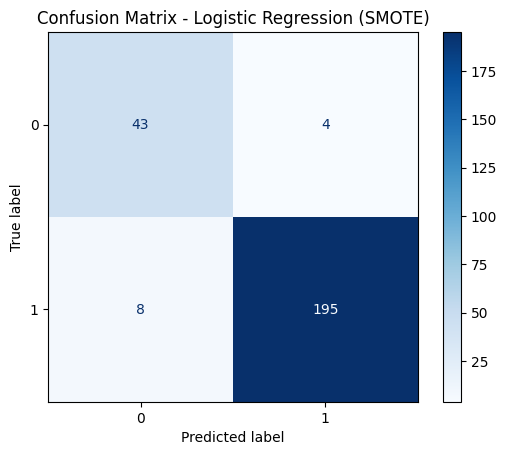

In [ ]:
# Using confusion matrix to evaluate model performance on class predictions

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.show()


The model correctly classified most samples, with 43 true negatives, 195 true positives, 4 false positives, and 8 false negatives, showing strong overall performance.

Before SMOTE:-

Accuracy: 0.7950

F1 Score: 0.7878

ROC AUC: 0.8697


After SMOTE:-

Accuracy: 0.9520 → Big improvement!

F1 Score: 0.9527 → Huge increase!

ROC AUC: 0.9710 → Much better class separation!

In [15]:
import joblib

# Saving the model pipeline to a file
joblib.dump(pipeline, 'logreg_smote_pipeline.pkl')


['logreg_smote_pipeline.pkl']